Saving images.jpg to images (1).jpg


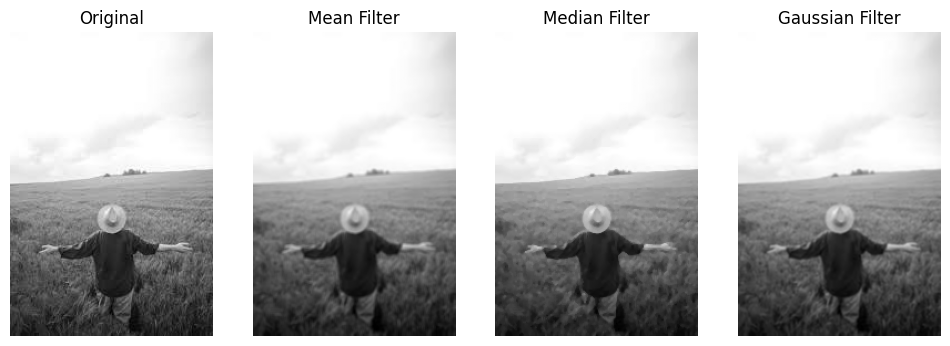

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Mean Filter
mean_filter = cv2.blur(img, (3, 3))

# Median Filter
median_filter = cv2.medianBlur(img, 3)

# Gaussian Filter
gaussian_filter = cv2.GaussianBlur(img, (3, 3), 0)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(mean_filter, cmap='gray'); plt.title("Mean Filter"); plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(median_filter, cmap='gray'); plt.title("Median Filter"); plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(gaussian_filter, cmap='gray'); plt.title("Gaussian Filter"); plt.axis('off')
plt.show()


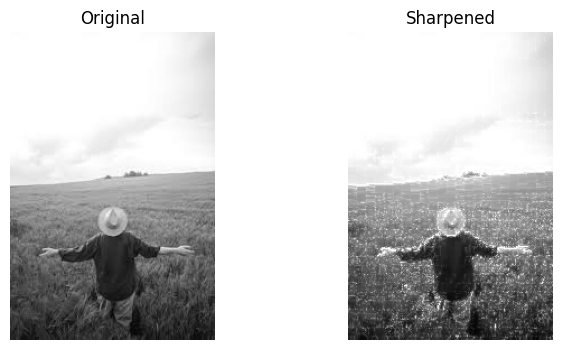

In [ ]:
# Apply Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Sharpened Image
sharpened = cv2.addWeighted(img, 1.0, laplacian, 1.0, 0)

# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(sharpened, cmap='gray'); plt.title("Sharpened"); plt.axis('off')
plt.show()


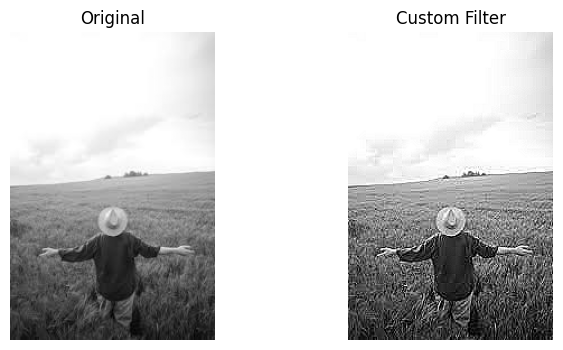

In [ ]:
# Define Custom Kernel (Example: Sharpening)
custom_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Apply custom kernel
custom_filtered = cv2.filter2D(img, -1, custom_kernel)

# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(custom_filtered, cmap='gray'); plt.title("Custom Filter"); plt.axis('off')
plt.show()


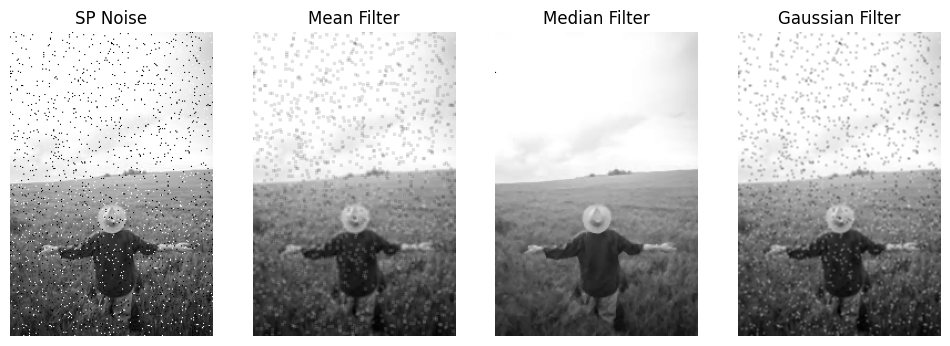

In [ ]:
# Add Salt & Pepper noise
def add_salt_pepper_noise(image, amount=0.05):
    noisy = image.copy()
    num_salt = np.ceil(amount * image.size * 0.5).astype(int)
    num_pepper = np.ceil(amount * image.size * 0.5).astype(int)
    # Salt
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255
    # Pepper
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0
    return noisy

sp_noisy = add_salt_pepper_noise(img)

# Apply filters on noisy image
mean_sp = cv2.blur(sp_noisy, (3,3))
median_sp = cv2.medianBlur(sp_noisy, 3)
gaussian_sp = cv2.GaussianBlur(sp_noisy, (3,3), 0)

# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.imshow(sp_noisy, cmap='gray'); plt.title("SP Noise"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(mean_sp, cmap='gray'); plt.title("Mean Filter"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(median_sp, cmap='gray'); plt.title("Median Filter"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(gaussian_sp, cmap='gray'); plt.title("Gaussian Filter"); plt.axis('off')
plt.show()


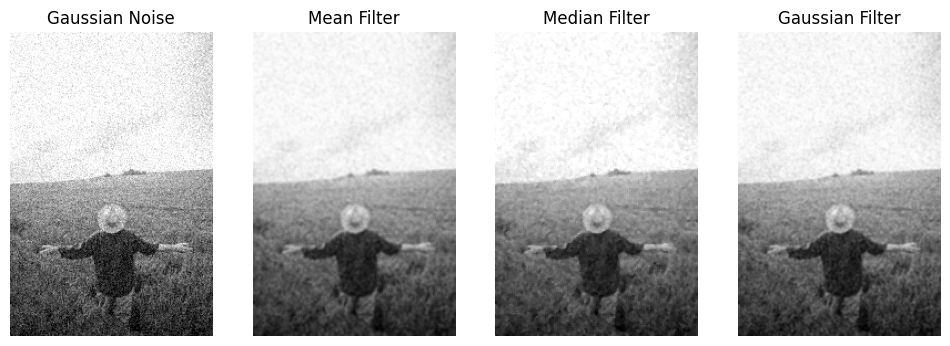

✅ Best Filter Recommendations:
Salt & Pepper Noise → Median Filter
Gaussian Noise → Gaussian Filter


In [ ]:
# Add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=20):
    gauss = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

gaussian_noisy = add_gaussian_noise(img)

# Apply filters
mean_gauss = cv2.blur(gaussian_noisy, (3,3))
median_gauss = cv2.medianBlur(gaussian_noisy, 3)
gaussian_gauss = cv2.GaussianBlur(gaussian_noisy, (3,3), 0)

# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.imshow(gaussian_noisy, cmap='gray'); plt.title("Gaussian Noise"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(mean_gauss, cmap='gray'); plt.title("Mean Filter"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(median_gauss, cmap='gray'); plt.title("Median Filter"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(gaussian_gauss, cmap='gray'); plt.title("Gaussian Filter"); plt.axis('off')
plt.show()

print("✅ Best Filter Recommendations:")
print("Salt & Pepper Noise → Median Filter")
print("Gaussian Noise → Gaussian Filter")
